In [ ]:
from plot import plot
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from river.drift import PageHinkley

1820 ne
12000 e

Série temporal

In [ ]:
feature = 'umidrelmed2m'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 0
plot(series[feature][index:index+96*20], figsize=(6,4), show_axis=(False, False),
    # save=True,
    img_name='imagens_quali/serie_temporal.jpeg', frame=False)

Série (não) estacionária

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 12000
res = adfuller(series[feature][index:index+96*7])
plot(series[feature][index:index+96*7],
	title=f'{res[4]["5%"] - res[0]:.2f} ({"" if (res[4]["5%"] - res[0]) > 0 else "não-"}estacionária)',
	show_axis=(False, False),
	# save=True,
	img_name='imagens_quali/estacionaria.jpeg',
	dpi=720,
)
plot(series[feature][index:index+96*7],
	# title=f'{res[4]["5%"] - res[0]:.2f} ({"" if (res[4]["5%"] - res[0]) > 0 else "não-"}estacionária)',
	show_axis=(False, False),
	# save=True,
	img_name='imagens_quali/estacionaria_sem_nada.jpeg',
	frame=False,
	dpi=720,
)

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 13500
con_drift = series[feature][index:index+96*20].to_list()
plot(con_drift,
	show_axis=(False, False),
	# save=True,
	img_name='imagens_quali/concept_drift.jpeg',
	dpi=720,
	frame=False,
	divisions=[i for i in range(610,850)],
)

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 13500
con_drift = series[feature][index:index+96*20].to_list()

detector = PageHinkley(
	alpha=1-0.0001,
	delta=1,
	threshold=100,
	mode='both',
)
drifts = []
for i, x in enumerate(con_drift):
  detector.update(x)
  if detector.drift_detected:
    drifts.append(i)

plot(con_drift,
	show_axis=(False, False),
	# save=True,
	img_name='imagens_quali/page_hinkley.jpeg',
	dpi=720,
	frame=False,
	divisions=drifts,
)

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 13500
con_drift = series[feature][index:index+96*20].to_list()

plot(con_drift,
	# save=True,
	figsize=(5.25,3.5),
	img_name='imagens_quali/segmentation_ex.jpeg',
	dpi=720,
	divisions=[600, 900],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#0066FF'}
  ],
)

Top-Down

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 13500
con_drift = series[feature][index:index+96*20].to_list()

plot(con_drift,
	# save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/top down/top_down_1.jpeg',
	dpi=720,
	show_axis=(False, False),
	backgrounds=[
		{'start': 0,'end': len(con_drift), 'color': '#0066FF'},
  ],
)

plot(con_drift,
	# save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/top down/top_down_2.jpeg',
	dpi=720,
	divisions=[600],
	show_axis=(False, False),
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': len(con_drift), 'color': '#D3321D'},
  ],
)

plot(con_drift,
	# save=True,
	img_name='imagens_quali/top down/top_down_3.jpeg',
	figsize=(3.5,3),
	dpi=720,
	divisions=[600, 900],
	show_axis=(False, False),
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#66DF4D'}
  ],
)

Bottom-up

In [ ]:
from segmentation_algorithms.bottomup import BottomUp

In [ ]:
# bu = BottomUp(con_drift)
# segs = bu.fit(
#   					3,
# 						init_seg_size=4,
#       			# print_when=[80, 10, 9, 5],
#          		# path='./imagens_quali/bottom up'
# 					)

In [ ]:
# divs = [seg['end'] for seg in segs][:-1]
# plot(con_drift,
# 	divisions=divs,
# 	show=False,
# 	save=True,
# 	img_name='./imagens_quali/bottom up/bottom_up_final.jpeg',
# 	show_axis=(False, False),
# 	figsize=(3.5,3),
# 	dpi=720,
# 	backgrounds=[
# 		{'start': 0,'end': divs[0], 'color': '#0066FF'},
# 		{'start': divs[0],'end': divs[1], 'color': '#D3321D'},
# 		{'start': divs[1],'end': len(con_drift), 'color': '#66DF4D'}
# 	],
# )

Sliding window

In [ ]:
feature = 'tempsolocm20cm'
series = pd.read_csv(f'./datasets/base datasets/23025122/export_automaticas_23025122_{feature}.csv')
index = 13500
con_drift = series[feature][index:index+96*20].to_list()

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_1.jpeg',
	dpi=720,
	show_axis=(True, False),
	labels=[
  	{'x': 0, 'label': 'Âncora'}
	],
	divisions=[0],
	backgrounds=[
		{'start': 0,'end': len(con_drift), 'color': '#66DF4D'},
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_2.jpeg',
	dpi=720,
	show_axis=(False, False),
	# labels=[
  # 	{'x': 0, 'label': 'Âncora'}
	# ],
	divisions=[i for i in range(0, 200)],
	backgrounds=[
		{'start': 0,'end': 200, 'color': '#0066FF'},
		{'start': 200,'end': len(con_drift), 'color': '#66DF4D'},
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_3.jpeg',
	dpi=720,
	show_axis=(False, False),
	# labels=[
  # 	{'x': 0, 'label': 'Âncora'}
	# ],
	divisions=[i for i in range(0, 600)],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': len(con_drift), 'color': '#66DF4D'},
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_4.jpeg',
	dpi=720,
	show_axis=(True, False),
	labels=[
  	{'x': 600, 'label': 'Nova âncora'}
	],
	divisions=[600],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': len(con_drift), 'color': '#66DF4D'},
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_5.jpeg',
	dpi=720,
	show_axis=(False, False),
	divisions=[i for i in range(600, 900)],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#66DF4D'}
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_6.jpeg',
	dpi=720,
	show_axis=(True, False),
	labels=[
  	{'x': 900, 'label': 'Nova âncora'}
	],
	divisions=[600, 900],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#66DF4D'}
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_7.jpeg',
	dpi=720,
	show_axis=(False, False),
	divisions=[600, *[i for i in range(900, len(con_drift))]],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#66DF4D'}
  ],
)

plot(con_drift,
	save=True,
	figsize=(3.5,3),
	img_name='imagens_quali/sliding window/sliding_window_8.jpeg',
	dpi=720,
	show_axis=(False, False),
	divisions=[600, 900],
	backgrounds=[
		{'start': 0,'end': 600, 'color': '#0066FF'},
		{'start': 600,'end': 900, 'color': '#D3321D'},
		{'start': 900,'end': len(con_drift), 'color': '#66DF4D'}
  ],
)

Feature importante

preds       setosa  versicolor  virginica
actual                                   
setosa          13           0          0
versicolor       0          18          0
virginica        0           2         16


Text(0.5, 0, 'Relative Importance')

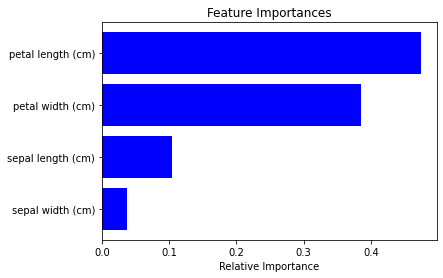

In [27]:
#Modified from the example written by yhat that can be found here:
#http://blog.yhathq.com/posts/random-forests-in-python.html

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

train, test = df[df['is_train']==True], df[df['is_train']==False]
features = df.columns[0:4]

forest = RFC(n_jobs=2,n_estimators=50)
y, _ = pd.factorize(train['species'])
forest.fit(train[features], y)

preds = iris.target_names[forest.predict(test[features])]
print(pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds']))

importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')